## Titanic - Machine Learning from Disaster
Source: https://www.kaggle.com/competitions/titanic/overview

### A. Problem Definition
* Create machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
* In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc

### B. Dataset
The datasets include passenger information like `name`, `age`, `gender`, `socio-economic class`, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

* The `Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

* The `Test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

* Using the patterns you find in the `train.csv` data, predict whether the other 418 passengers on board (found in `test.csv`) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

**The data has been split into two groups:**

* `training set (train.csv)`
* `test set (test.csv)`
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### C. Data Dictionary

1. `survival`	Survival	0 = No, 1 = Yes
2. `pclass`	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. `sex`	Sex
4. `Age`	Age in years
5. `sibsp`	# of siblings / spouses aboard the Titanic
6. `parch`	# of parents / children aboard the Titanic
7. `ticket`	Ticket number
8. `fare`	Passenger fare
9. `cabin`	Cabin number
10. `embarked`	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### D. Evaluation
**Goal**<br>
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

**Metric**<br>
Your score is the percentage of passengers you correctly predict. This is known as accuracy (https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification)

## 1. Import Machine Learning Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Dataset

### 2.1 Dataset Overview

In [2]:
titanic_data = pd.read_csv('datasets/titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2.2 Copy dataset

* Drop unnecessary features like `Name`, `Ticket`, `Sex`, `Ticket` and `Cabin`

In [7]:
titanic_data_copy = titanic_data.copy()

In [8]:
titanic_data_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data_copy.drop(['Name', 'Ticket', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [10]:
titanic_data_copy.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [11]:
titanic_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


### 2.2 EDA

#### 2.2.1 Data Correlation

In [12]:
corr_matrix = titanic_data_copy.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


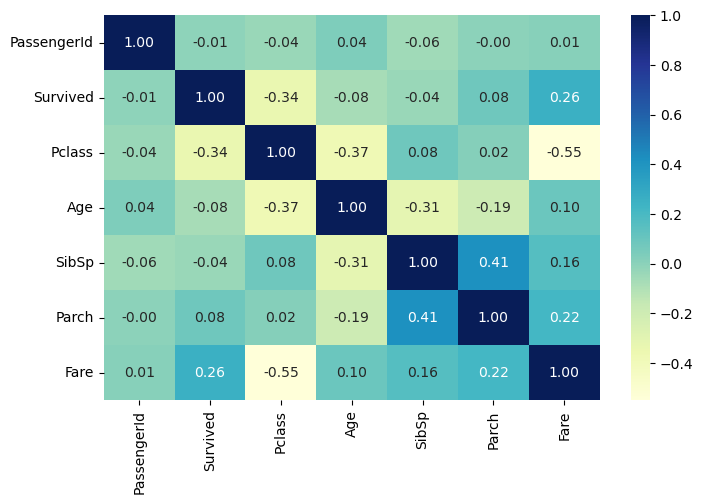

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corr_matrix, 
                 annot=True, # Add value to the matrix
                 fmt='.2f',
                 cmap='YlGnBu')
plt.show()

In [38]:
titanic_data_copy['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=5, # just like cross validataion
                                test_size=0.2, 
                                random_state=0) # repoduceable, result concistencie

rte = splitter.split(titanic_data_copy, titanic_data_copy[['Survived', 'Pclass']])

for train_idx, test_idx in rte: # 80:20
    print(train_idx[100])

408
554
647
576
102


In [100]:
len(titanic_data_copy)

891

In [102]:
712+179

891

In [87]:
data = pd.DataFrame(
    {'Nama': ['Badu', 'Rini', 'Didi', 'Irma'],
     'Alamat': ['Medan', 'Medan', 'Binjai', 'Sunggal'], 
     'Pekerjaan': ['Staff', 'Staff', 'Pegawai', 'OS']}, index=None)
data


,Nama,Alamat,Pekerjaan
0,Badu,Medan,Staff
1,Rini,Medan,Staff
2,Didi,Binjai,Pegawai
3,Irma,Sunggal,OS


In [82]:
data.loc[:2, 'Alamat']

0     Medan
1     Medan
2    Binjai
Name: Alamat, dtype: object